In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import math
%matplotlib inline

In [4]:
df=pd.read_csv('data L = 4 .csv')
a=df.iloc[0,:]
print(a)

Unnamed: 0    0.000000
T             1.700000
M             0.969650
chi           0.066742
C             0.337780
Name: 0, dtype: float64


alpha= 0
beta= 1/8
gamma= 7/4
nu=1

In [5]:
def scaling(Q,T,L,a,b):
    T_c=2.269
    t=(T-T_c)/T_c
    y=Q*L**(-a/b)
    x=t*L**(1/b)
    return x,y

In [13]:
def scalingC(Q,T,L,a,b):
    T_c=2.269
    t=(T-T_c)/T_c
    y=Q/(np.log(L))
    x=t*L**(1/b)
    return x,y

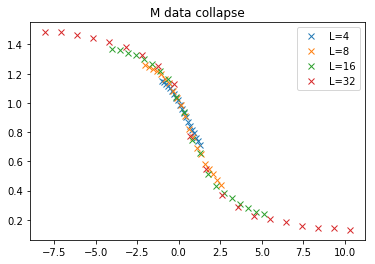

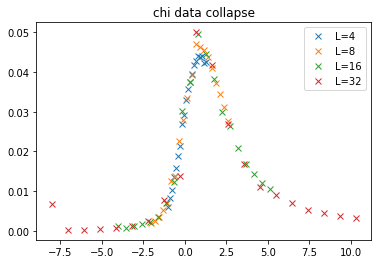

In [7]:
Ls=[4,8,16,32]
alpha=0
beta=-1/8
gamma=7/4
nu=1
Name=['M','chi']
critical_exp=[beta,gamma]

for i in range(2,4):
    fig=plt.figure()
    for L in Ls:
        df=pd.read_csv('data L = %.d .csv'%L)
        Ts=df.iloc[:,1]
        Qs=df.iloc[:,i]
        xlist=[]
        ylist=[]
        for j in range(len(Qs)):
            x,y=scaling(Qs[j],Ts[j],L,critical_exp[i-2],nu)
            xlist.append(x)
            ylist.append(y)
        plt.plot(xlist,ylist,'x',label='L=%d'%L)
    plt.title('{} data collapse'.format(Name[i-2]))
    plt.legend()

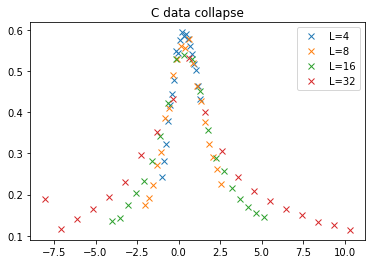

In [14]:
Ls=[4,8,16,32]
nu=1
Name=['C']
critical_exp=[beta,gamma]

for L in Ls:
    df=pd.read_csv('data L = %.d .csv'%L)
    Ts=df.iloc[:,1]
    Qs=df.iloc[:,4]
    xlist=[]
    ylist=[]
    alpha=math.log(L)
    for j in range(len(Qs)):
        x,y=scalingC(Qs[j],Ts[j],L,alpha,nu)
        xlist.append(x)
        ylist.append(y)
    plt.plot(xlist,ylist,'x',label='L=%d'%L)
plt.title('C data collapse')
plt.legend()